In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression

In [2]:
df_train=pd.read_csv("D:\\Nishanth\\Datasets\\loan_pred_train.csv")
df_test=pd.read_csv("D:\\Nishanth\\Datasets\\loan_pred_test.csv")

In [3]:
df_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
df_train.shape

(614, 13)

In [6]:
df_train.loc[df_train['Gender']=='Male']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [7]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
df_train.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002408,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [10]:
df_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df_train['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
df_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [13]:
df_train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [14]:
df_train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [15]:
df_train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [16]:
df_train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

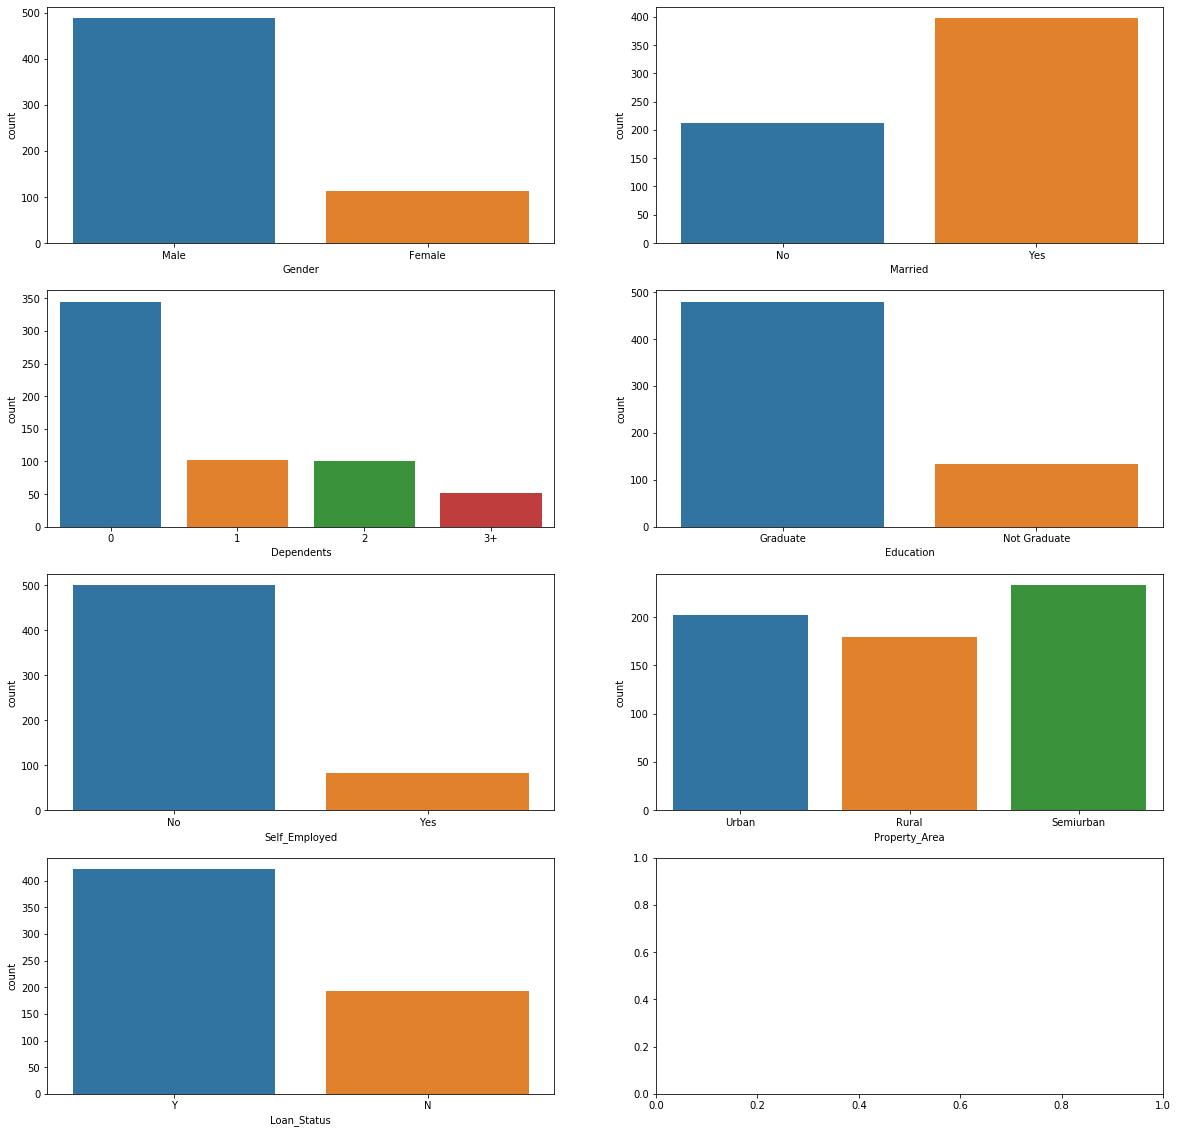

In [17]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.countplot(df_train['Gender'],ax=ax[0][0])
sns.countplot(df_train['Married'],ax=ax[0][1])
sns.countplot(df_train['Dependents'],ax=ax[1][0])
sns.countplot(df_train['Education'],ax=ax[1][1])
sns.countplot(df_train['Self_Employed'],ax=ax[2][0])
sns.countplot(df_train['Property_Area'],ax=ax[2][1])
sns.countplot(df_train['Loan_Status'],ax=ax[3][0])
plt.show()

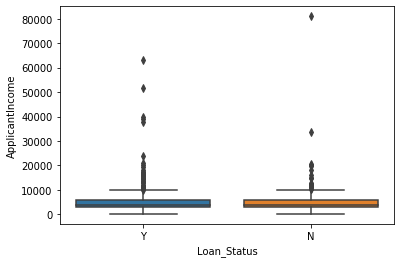

In [18]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=df_train)

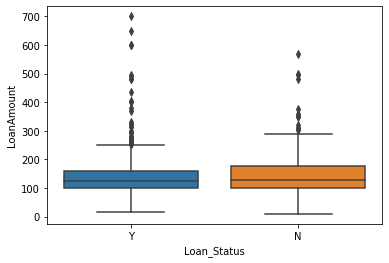

In [19]:
sns.boxplot(x='Loan_Status',y='LoanAmount',data=df_train)

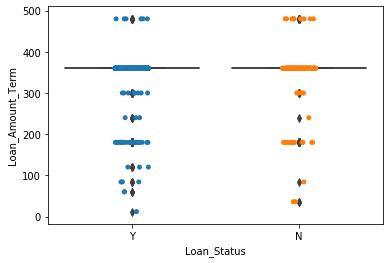

In [20]:
sns.boxplot(x='Loan_Status',y='Loan_Amount_Term',data=df_train)
sns.stripplot(x='Loan_Status',y='Loan_Amount_Term',data=df_train)

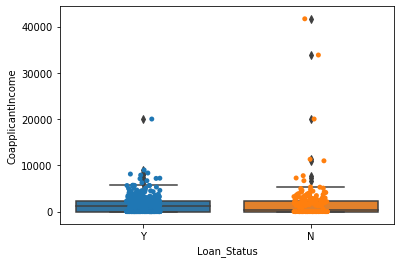

In [21]:
sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=df_train)
sns.stripplot(x='Loan_Status',y='CoapplicantIncome',data=df_train)

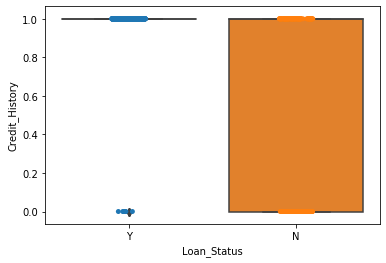

In [22]:
sns.boxplot(x='Loan_Status',y='Credit_History',data=df_train)
sns.stripplot(x='Loan_Status',y='Credit_History',data=df_train)

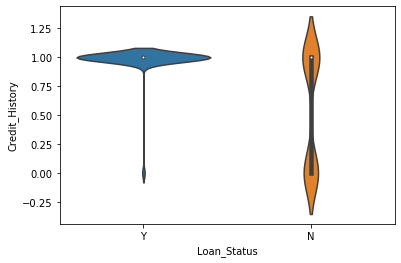

In [23]:
sns.violinplot(x='Loan_Status',y='Credit_History',data=df_train)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


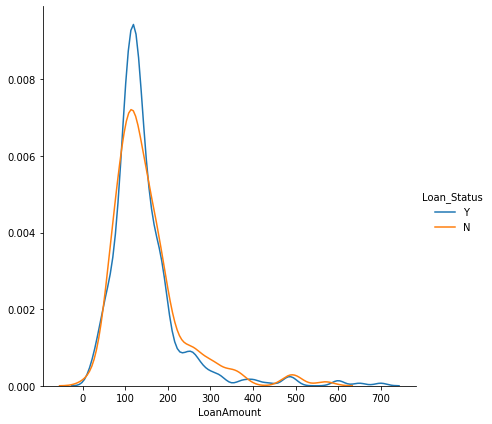

In [24]:
sns.FacetGrid(df_train, hue="Loan_Status", size=6) \
   .map(sns.kdeplot, "LoanAmount") \
   .add_legend()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


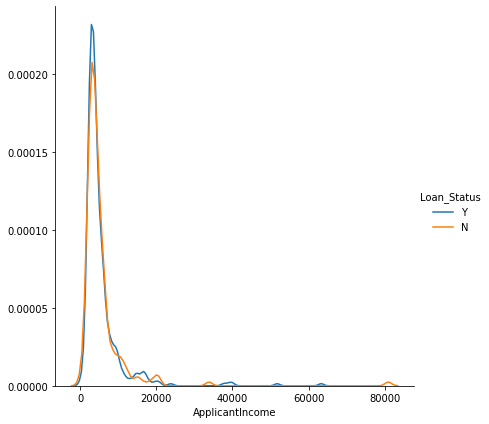

In [25]:
sns.FacetGrid(df_train, hue="Loan_Status", size=6) \
   .map(sns.kdeplot, "ApplicantIncome") \
   .add_legend()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


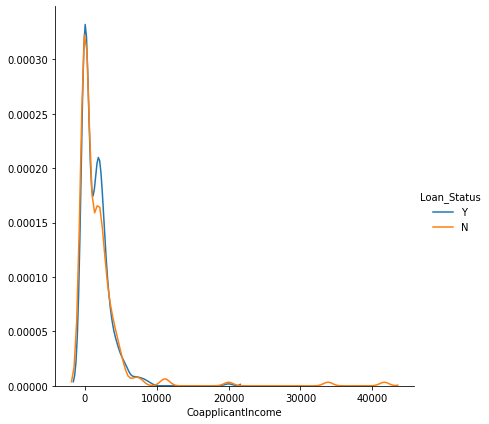

In [26]:
sns.FacetGrid(df_train, hue="Loan_Status", size=6) \
   .map(sns.kdeplot, "CoapplicantIncome") \
   .add_legend()

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


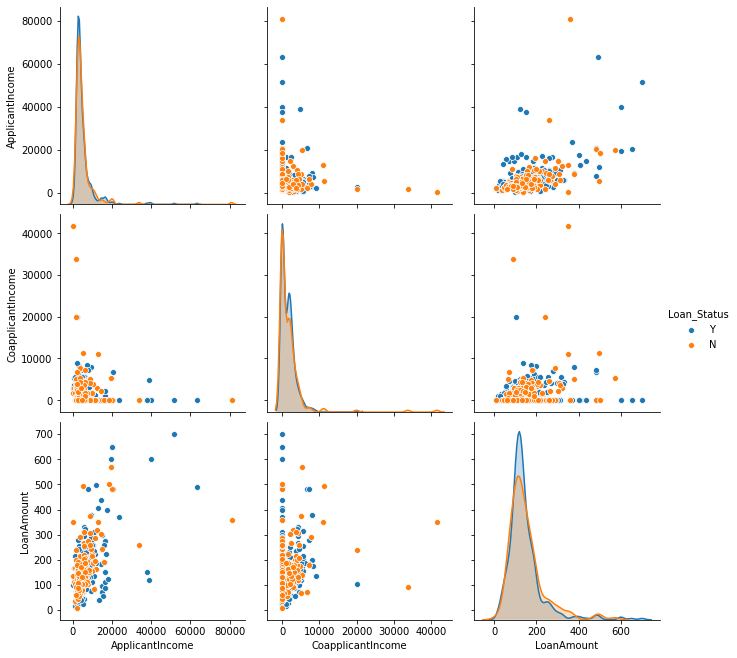

In [27]:
sns.pairplot(df_train.drop(columns=['Loan_ID','Loan_Amount_Term','Credit_History']), hue="Loan_Status", size=3)

In [28]:
combined=df_train.drop(columns=['Loan_Status']).append(df_test)

In [29]:
combined=combined.drop(columns=['Loan_ID'])
combined.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [30]:
cols=combined.columns
cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [31]:
def missing_values(dataframe,feature):
    if dataframe[feature].dtype=='O':
        dataframe[feature].fillna(dataframe[feature].dropna().mode()[0],inplace=True)
    else:
        dataframe[feature].fillna(dataframe[feature].dropna().median(),inplace=True)

In [32]:
for i,j in enumerate(combined.isnull().sum()):
    if j>0:
        missing_values(combined,cols[i])

In [33]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [34]:
cat_cols=[]
for i,j in enumerate(combined.dtypes):
    if(j==object):
        cat_cols.append(combined.columns[i])

print(cat_cols)


['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [35]:
for feature in list(combined.columns):
    if feature in cat_cols:
        combined[feature] = combined[feature].astype('category')

In [36]:
combined.dtypes

Gender               category
Married              category
Dependents           category
Education            category
Self_Employed        category
ApplicantIncome         int64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Amount_Term      float64
Credit_History        float64
Property_Area        category
dtype: object

In [37]:
combined['Total_Income']=combined['ApplicantIncome']+combined['CoapplicantIncome']
combined=combined.drop(columns=['ApplicantIncome','CoapplicantIncome'])
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,Male,No,0,Graduate,No,126.0,360.0,1.0,Urban,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0


In [38]:
res=combined
for feature in cat_cols:
    dummies = pd.get_dummies(combined[[feature]])
    dummies=dummies.iloc[:,1:]
    res = pd.concat([res, dummies], axis=1)
    res = res.drop([feature], axis=1)

In [39]:
res.head()

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,126.0,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1


In [40]:
res.shape

(981, 13)

In [41]:
x_train,x_test=res.head(df_train.shape[0]),res.iloc[df_train.shape[0]:]

In [42]:
x_train

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,126.0,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,2900.0,0,0,0,0,0,0,0,0,0
610,40.0,180.0,1.0,4106.0,1,1,0,0,1,0,0,0,0
611,253.0,360.0,1.0,8312.0,1,1,1,0,0,0,0,0,1
612,187.0,360.0,1.0,7583.0,1,1,0,1,0,0,0,0,1


In [43]:
x_test

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,110.0,360.0,1.0,5720.0,1,1,0,0,0,0,0,0,1
1,126.0,360.0,1.0,4576.0,1,1,1,0,0,0,0,0,1
2,208.0,360.0,1.0,6800.0,1,1,0,1,0,0,0,0,1
3,100.0,360.0,1.0,4886.0,1,1,0,1,0,0,0,0,1
4,78.0,360.0,1.0,3276.0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,113.0,360.0,1.0,5786.0,1,1,0,0,1,1,1,0,1
363,115.0,360.0,1.0,4867.0,1,1,0,0,0,0,0,0,1
364,126.0,360.0,1.0,5243.0,1,0,0,0,0,0,0,1,0
365,158.0,360.0,1.0,7393.0,1,1,0,0,0,0,0,0,0


In [44]:
y_train=df_train['Loan_Status'].map({'Y':1,'N':0})

In [45]:
y_train

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
y_pred=model.predict(x_test)

In [48]:
model.score(x_train,y_train)

0.8078175895765473

In [49]:
import statsmodels.api as sm

In [56]:
corr_data=pd.concat([x_train,y_train],axis=1)
corr_data

,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,126.0,360.0,1.0,5849.0,1,0,0,0,0,0,0,0,1,1
1,128.0,360.0,1.0,6091.0,1,1,1,0,0,0,0,0,0,0
2,66.0,360.0,1.0,3000.0,1,1,0,0,0,0,1,0,1,1
3,120.0,360.0,1.0,4941.0,1,1,0,0,0,1,0,0,1,1
4,141.0,360.0,1.0,6000.0,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,71.0,360.0,1.0,2900.0,0,0,0,0,0,0,0,0,0,1
610,40.0,180.0,1.0,4106.0,1,1,0,0,1,0,0,0,0,1
611,253.0,360.0,1.0,8312.0,1,1,1,0,0,0,0,0,1,1
612,187.0,360.0,1.0,7583.0,1,1,0,1,0,0,0,0,1,1


In [58]:
cols=np.full(corr_data.corr().shape[0],True)
for i in range(0,corr_data.corr().shape[0]):
    for j in range(i+1,corr_data.corr().shape[0]):
        if corr_data.corr().iloc[i,j]>=0.9:
            if cols[j]:
                cols[j]=False
sel_cols=corr_data.columns[cols]

In [59]:
sel_cols

Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Total_Income',
       'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status'],
      dtype='object')

In [70]:
p_cols=sel_cols[:-1]
p_cols=np.insert(p_cols,0,'Constant')
p_cols

Index(['Constant', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Total_Income', 'Gender_Male', 'Married_Yes', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [75]:
def backward_elim(x,y,sl,cols):
    num_vars=len(x[0])
    for i in range(0,num_vars):
        model_ols=sm.OLS(y,x).fit()
        max_var=max(model_ols.pvalues)
        if max_var>sl:
            for j in range(0,num_vars-i):
                if model_ols.pvalues[j]==max_var:
                    x=np.delete(x,j,1)
                    cols=np.delete(cols,j)
    print(model_ols.summary())
    return x,cols
sl=0.05
data=corr_data.drop(columns=['Loan_Status']).values
data=np.append(np.ones((data.shape[0],1)).astype(int),data,axis=1)
data_modeled,selected_columns=backward_elim(data,y_train,sl,p_cols)             

                                 OLS Regression Results                                
Dep. Variable:            Loan_Status   R-squared (uncentered):                   0.785
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              744.5
Date:                Thu, 02 Apr 2020   Prob (F-statistic):                   1.52e-203
Time:                        12:20:34   Log-Likelihood:                         -283.93
No. Observations:                 614   AIC:                                      573.9
Df Residuals:                     611   BIC:                                      587.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [76]:
selected_columns

Index(['Credit_History', 'Married_Yes', 'Property_Area_Semiurban'], dtype='object')

In [79]:
data_modeled

array([[1., 0., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       ...,
       [1., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.]])

In [77]:
model_f=LogisticRegression()
model_f.fit(data_modeled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
final_ypred=model_f.predict(x_test[selected_columns].values)

In [96]:
sub_pred=list(map(lambda x:'Y' if x==1 else 'N',list(final_ypred)))

In [83]:
model_f.score(data_modeled,y_train)

0.8094462540716613

In [97]:
 submission=pd.DataFrame(
 {
     "Loan_ID":df_test['Loan_ID'],
     "Loan_Status":sub_pred
 })
submission.to_csv('submission_loan_pred.csv', index=False)